In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plain_mod_size = 17
xdepth = 20
coeff_mod_data_level_size = 666

In [3]:
id = f"{plain_mod_size}_{xdepth}_{coeff_mod_data_level_size}"
file_name = f"noise_budget_logging/{id}.txt"
noise_budget_progresses = np.loadtxt(file_name, dtype=int)
repeat = noise_budget_progresses.shape[0]
mul_noise_growths = np.delete(noise_budget_progresses, -1, 1) - np.delete(noise_budget_progresses, 0, 1)

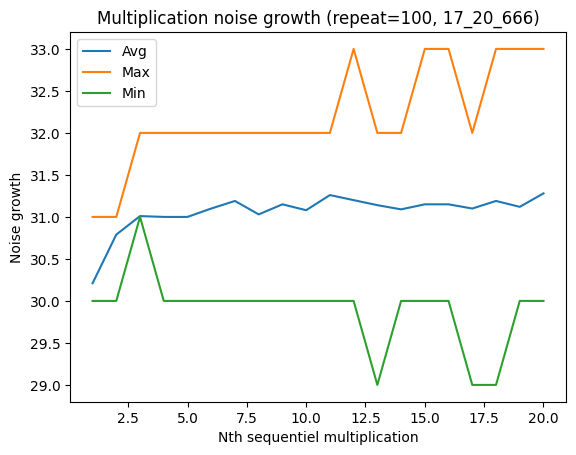

In [4]:
x = np.arange(1, xdepth + 1, 1)
avg_mul_noise_growth = np.mean(mul_noise_growths, axis=0)
max_mul_noise_growth = np.max(mul_noise_growths, axis=0)
min_mul_noise_growth = np.min(mul_noise_growths, axis=0)
fig, ax = plt.subplots()
ax.plot(x, avg_mul_noise_growth, label="Avg")
ax.plot(x, max_mul_noise_growth, label="Max")
ax.plot(x, min_mul_noise_growth, label="Min")
ax.set_title(f"Multiplication noise growth (repeat={repeat}, {id})")
ax.set_xlabel("Nth sequentiel multiplication")
ax.set_ylabel("Noise growth")
ax.legend()

In [5]:
avg_mul_noise = np.mean(avg_mul_noise_growth, axis=0)
avg_max_mul_noise = np.mean(max_mul_noise_growth, axis=0)
avg_min_mul_noise = np.mean(min_mul_noise_growth, axis=0)

print("avg_mul_noise:", np.mean(avg_mul_noise_growth, axis=0))
print("avg_max_mul_noise:", np.mean(max_mul_noise_growth, axis=0))
print("avg_min_mul_noise:", np.mean(min_mul_noise_growth, axis=0))

avg_mul_noise: 31.062
avg_max_mul_noise: 32.2
avg_min_mul_noise: 29.9


In [6]:
avg_fresh_noise = np.mean(coeff_mod_data_level_size - noise_budget_progresses[:, 0] - plain_mod_size)
max_fresh_noise = np.max(coeff_mod_data_level_size - noise_budget_progresses[:, 0] - plain_mod_size)
min_fresh_noise = np.min(coeff_mod_data_level_size - noise_budget_progresses[:, 0] - plain_mod_size)

print("avg_fresh_noise:", avg_fresh_noise)
print("max_fresh_noise:", max_fresh_noise)
print("min_fresh_noise:", min_fresh_noise)

avg_fresh_noise: 8.0
max_fresh_noise: 8
min_fresh_noise: 8


In [16]:
avg_remaining_budget = np.mean(noise_budget_progresses[:, -1])
max_remaining_budget = np.max(noise_budget_progresses[:, -1])
min_remaining_budget = np.min(noise_budget_progresses[:, -1])

print("avg_remaining_budget:", avg_remaining_budget)
print("max_remaining_budget:", max_remaining_budget)
print("min_remaining_budget:", min_remaining_budget)

print("found in", np.where(noise_budget_progresses[:, -1] == min_remaining_budget))

avg_remaining_budget: 19.76
max_remaining_budget: 22
min_remaining_budget: 14
found in (array([63]),)


In [10]:
# print(np.ceil(avg_mul_noise * xdepth + max_fresh_noise + plain_mod_size))
# print(np.ceil(avg_mul_noise) * xdepth + max_fresh_noise + plain_mod_size)
print(coeff_mod_data_level_size - min_remaining_budget + 1)
print(coeff_mod_data_level_size - np.ceil(min_remaining_budget - 0.3 * xdepth))

653
658.0
